<h2 style="color: #C3A3E2;">In this workshop, we’ll learn how to explore, clean, and analyze the famous **Titanic dataset** and try to answer a simple question: </h2>
<h3 style="color: #C3A3E2;">*What factors influenced passenger survival on the Titanic?*</h3>

---

<p style="font-size: 18px;">
The dataset contains information about passengers such as:<br>
- Age<br>
- Sex<br>
- Passenger class<br>
- Whether they survived or not<br>
We'll use it to practice data exploration, cleaning, visualization, and a tiny bit of analysis.
</p>



<h1>LET'S START</h1> <br><br>



In [28]:
# importing pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [29]:
#read csv data
data = pd.read_csv("titanic_dataset.csv")

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# preview 5 last rows
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [32]:
# preview data shape
data.shape

(891, 12)

In [33]:
#show columns names
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
#get insights on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
# describe the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
#let's work on a copy of our data to compare with the original
df= data.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Checking Null values

In [37]:
#checking missing values
print(df.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [38]:
# Count missing values per column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [39]:
#Lets check which rows have null Embarked column
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


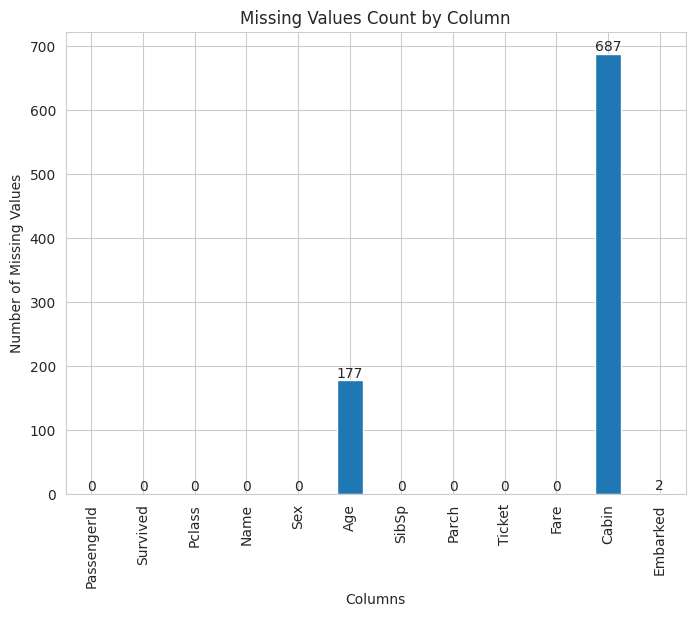

In [40]:
missing_data = df.isnull().sum()

ax = missing_data.plot(kind='bar', figsize=(8, 6))

plt.title("Missing Values Count by Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, rotation=0)
plt.show()

## Observations Null values

1. **Age column**: 177 missing values. A large portion of passengers do not have age data, requiring imputation or removal.
2. **Cabin column**: 687 missing values, the majority of cabin data is missing. It may need to be dropped or treated carefully.
3. **Embarked column**: 2 missing values. These can be imputed easily using the mode of the column.
4. **Survived column**: No missing values, so survival analysis can proceed without missing data.
5. **Other columns (PassengerId, Pclass, Sex, SibSp, Parch, Ticket, Fare)**: No missing values and ready for analysis.

## Taking care of the missing data

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
     &nbsp; Most machine learning models require data with a value for all features in each observation. In such models, missing data may lead to bias in the estimation of the parameters and also compromise the accuracy of the machine learning models.

As a result, we may end up drawing wrong conclusions about data. Therefore, missing data is harmful to machine learning models and requires appropriate handling.
</div>

## 1. Age (177 missing values)

### What to do:

* Imputation: Since age is an important variable, we should fill in the missing values.
    * One common approach is to fill missing values with the median age. This is better than using the mean because it reduces the influence of extreme values (outliers).
    * Alternatively, you could group passengers by similar characteristics (like Pclass and Sex) and fill the missing age values with the median within each group for better accuracy.

In [41]:
print("Missing values in Age column before imputation:", df['Age'].isnull().sum())

# Fill missing 'Age' values with the median of the 'Age' column
df['Age'] = df['Age'].fillna(df['Age'].median())

# Check if the missing values have been filled
print("Missing values in Age column after imputation:", df['Age'].isnull().sum())

Missing values in Age column before imputation: 177
Missing values in Age column after imputation: 0


## 2. Cabin (687 missing values)

### What to do:

Drop the column: Since a large portion of the cabin data is missing, and it might not be crucial for analysis, you could drop the column entirely.

### Why:
With so many missing values (687 out of total rows), trying to fill in this data would likely introduce noise or unreliable information into your analysis.

In [42]:
# Step 1: Check how many missing values are in the 'Cabin' column
print("Missing values in Cabin column before dropping:", df['Cabin'].isnull().sum())

# Step 2: Drop the 'Cabin' column from the DataFrame
df.drop(columns='Cabin', inplace=True)

# Step 3: Verify that the 'Cabin' column is removed
print("Cabin column exists after dropping:", 'Cabin' in df.columns)

Missing values in Cabin column before dropping: 687
Cabin column exists after dropping: False


### 3. Embarked (2 missing values)

### What to do:

* Impute with mode: Since there are only 2 missing values and "Embarked" is a categorical feature, you can fill these with the most frequent value (the mode).


### Why:

The impact of these missing values is minimal because there are only two, and filling them with the mode will preserve the integrity of the data without skewing the results.

In [43]:
# Step 1: Check the number of missing values in the 'Embarked' column
print("Missing values in Embarked column before imputation:", df['Embarked'].isnull().sum())

# Step 2: Fill missing 'Embarked' values with the mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Step 3: Check if the missing values have been filled
print("Missing values in Embarked column after imputation:", df['Embarked'].isnull().sum())

# Step 4: Verify the most frequent value in the 'Embarked' column (optional)
print("Most frequent value in Embarked column:", df['Embarked'].mode()[0])

Missing values in Embarked column before imputation: 2
Missing values in Embarked column after imputation: 0
Most frequent value in Embarked column: S


In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [45]:
df = df.drop(columns=['PassengerId','Name', 'Ticket'])

In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


* PassengerId: This column is unique for each passenger and doesn't provide useful information for predicting survival. It won’t help the model learn patterns since it's just an identifier.

* Name: Although it contains some potentially useful information (like titles indicating social status), it’s complex and varied, making it challenging to extract meaningful features. It’s often better to derive a simpler feature from it if needed.

* Ticket: Similar to PassengerId, this column is not useful for prediction. Ticket numbers are unique and do not indicate any information relevant to survival.


In [47]:
print('Before Null Value Handle')
print('\n')
print(data.isnull() .sum())
print('\n')
print('After Null Value Handle')
print('\n')
print(df.isnull() .sum())
print('\n')

Before Null Value Handle


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


After Null Value Handle


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64




### No Null Value

## checking the duplicate rows

In [48]:
# The sum() function will return the total count of duplicate rows.
df.duplicated().sum()

np.int64(116)

In [49]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<a id="EDA"></a>

# <div style="background-color: #D9C4EC; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  5. EDA </b></div>


In [50]:
#checking columns types
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [51]:
# 1. Separate categorical and numerical columns (float and int / object)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Sex', 'Embarked'], dtype='object')


Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

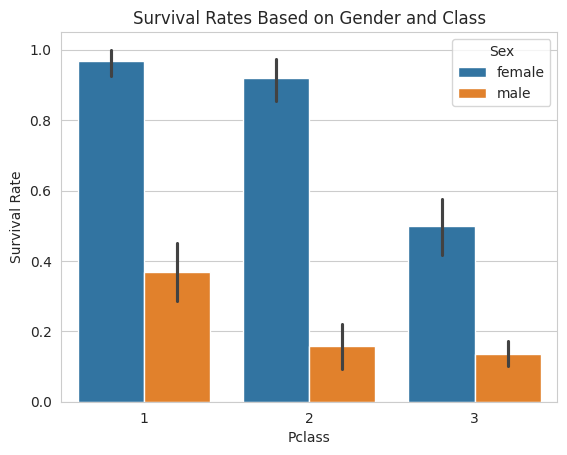

In [52]:
# Create a bar plot showing survival rates by passenger class (Pclass) and split by Sex
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

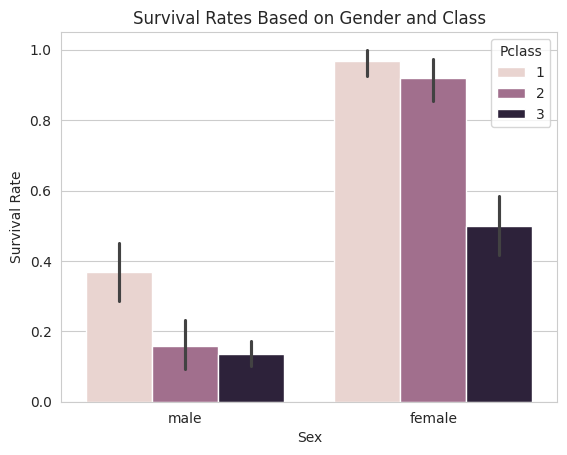

In [53]:
# Create a bar plot showing survival rates by gender, split by passenger class
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

## Age

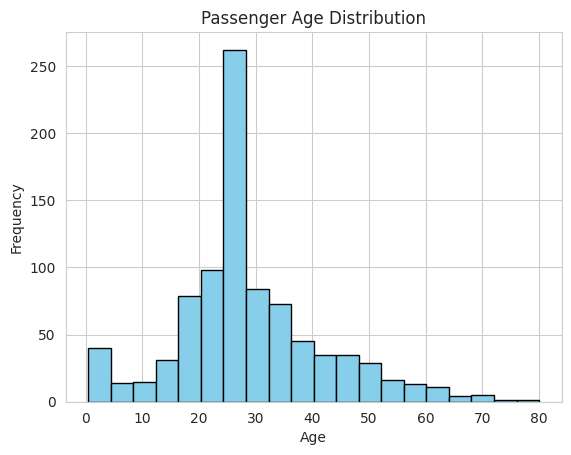

In [54]:
# Histogram of Age
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Passenger Age Distribution")
plt.show()

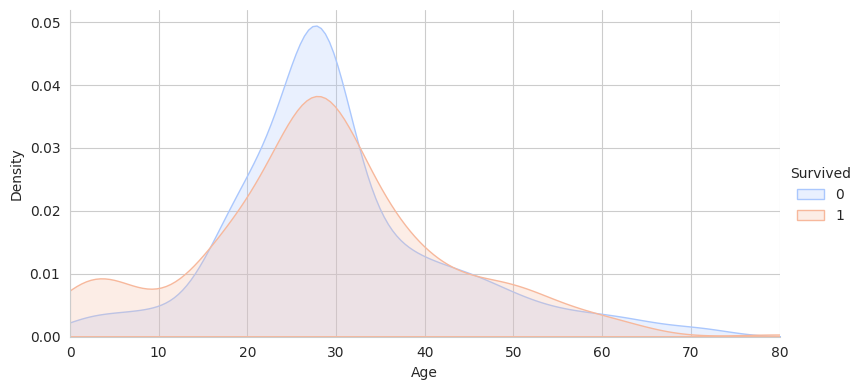

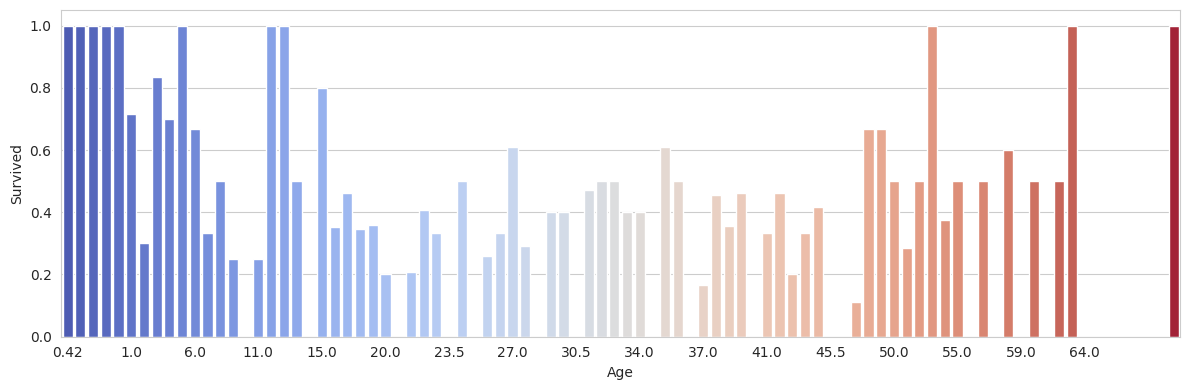

In [55]:
# Set up a compact FacetGrid with KDE plot for 'Age' distribution by 'Survived' status
facet = sns.FacetGrid(df, hue="Survived", aspect=2, height=4, palette="coolwarm")
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

# Plot the average survival rate by age
fig, ax = plt.subplots(figsize=(12, 4))  # Compact figure size

# Group by 'Age' and calculate the mean survival rate
average_age = df.groupby('Age', as_index=False)['Survived'].mean()

# Use a color palette to add variation based on the survival rate
colors = sns.color_palette("coolwarm", len(average_age))

# Bar plot with different colors for each bar
sns.barplot(x='Age', y='Survived', data=average_age, hue="Age", palette=colors, legend=False)

# Reduce the number of x-ticks for better readability
ax.set_xticks(range(0, int(df['Age'].max()) + 1, 5))

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


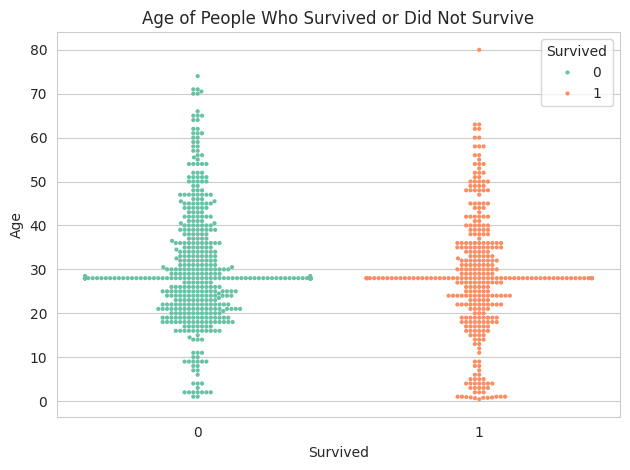

In [56]:
# Title of the plot
plt.title("Age of People Who Survived or Did Not Survive")

# Create a colorful swarm plot with different hues for 'Survived'
sns.swarmplot(x='Survived', y='Age', data=df, hue="Survived", palette="Set2", size=3)

# Display the plot
plt.tight_layout()
plt.show()

/tmp/ipython-input-1631804458.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived_ages, kde=False)
/tmp/ipython-input-1631804458.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_survived_ages, kde=False)


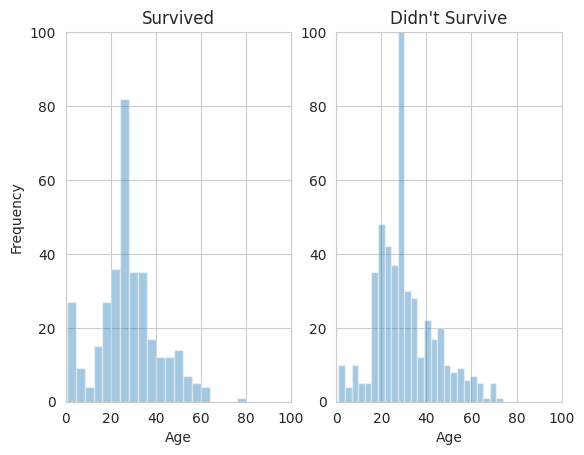

In [57]:
survived_ages = df[df.Survived == 1]["Age"]
not_survived_ages = df[df.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()

## Fare

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


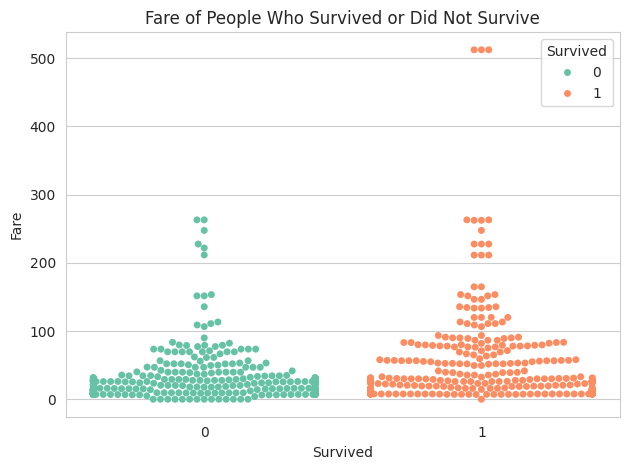

In [58]:
# Title of the plot
plt.title("Fare of People Who Survived or Did Not Survive")

# Create a colorful swarm plot with different hues for 'Survived'
sns.swarmplot(x='Survived', y='Fare', data=df, palette="Set2", hue="Survived")

# Display the plot
plt.tight_layout()
plt.show()

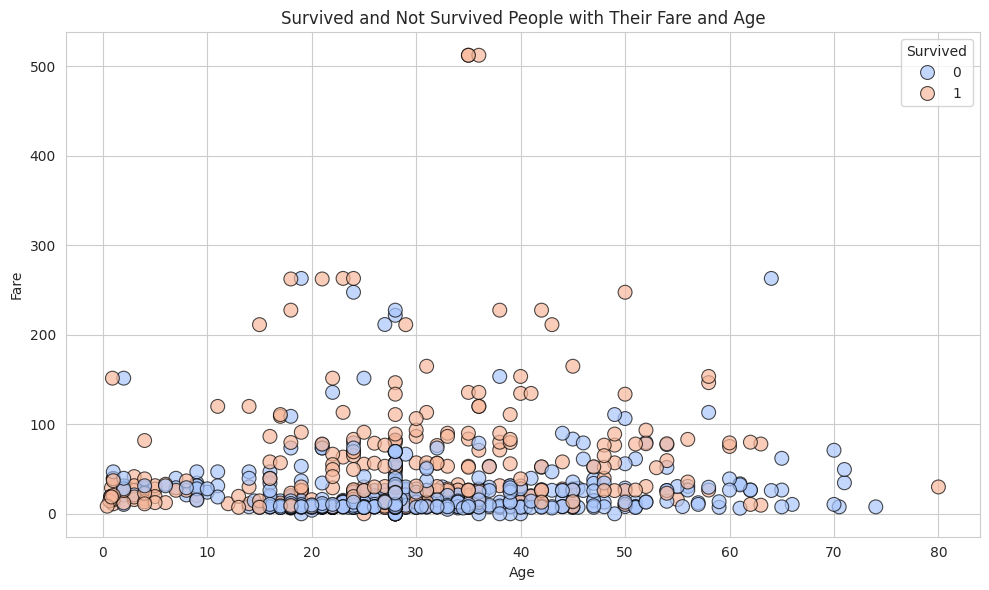

In [59]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Title of the plot
plt.title("Survived and Not Survived People with Their Fare and Age")

# Create a colorful scatter plot with hue for survival, larger points, and a different palette
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df,
                palette="coolwarm", s=100, edgecolor="black", alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

## Touskié

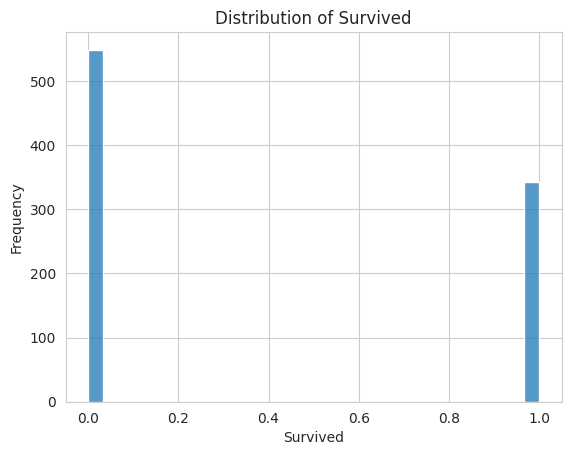

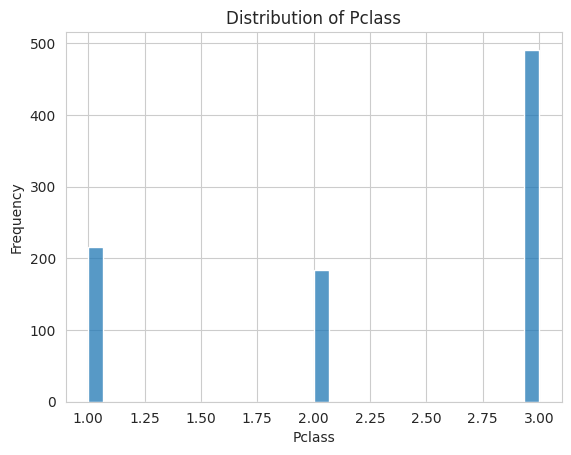

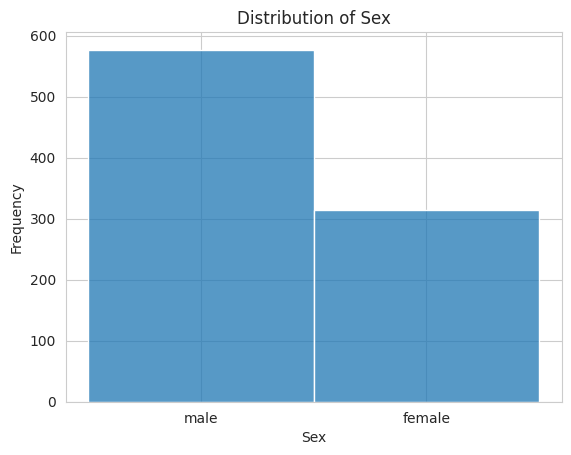

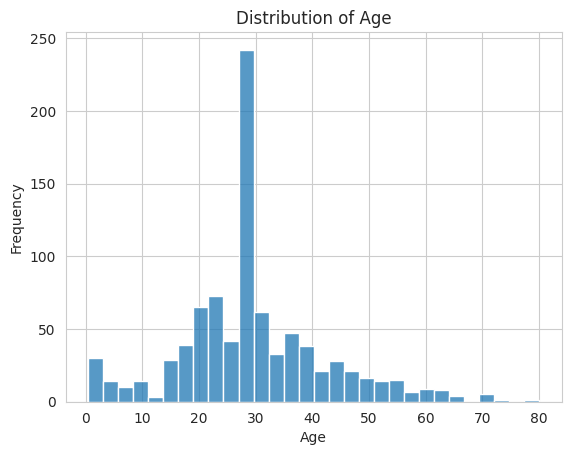

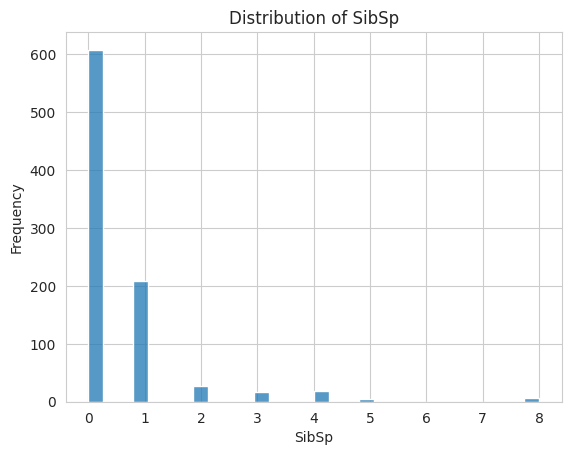

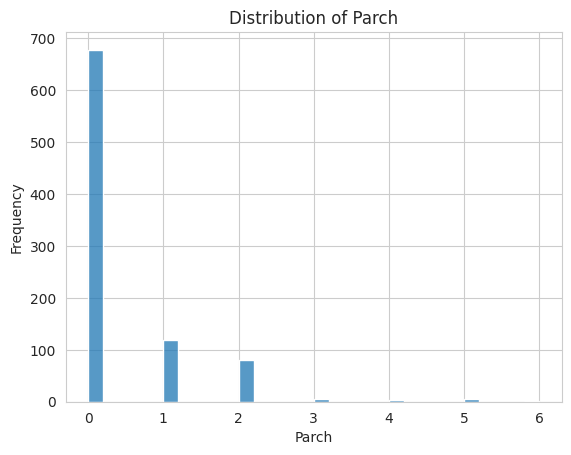

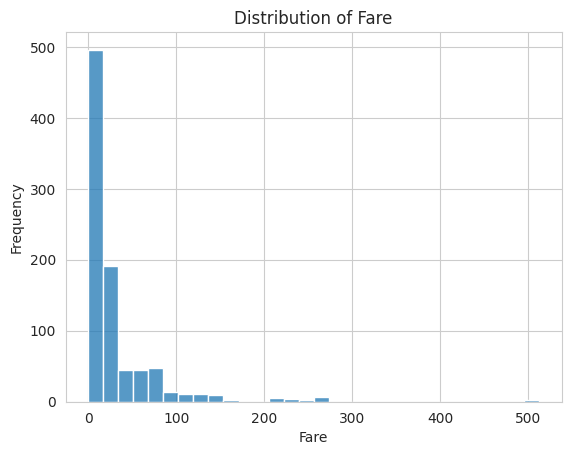

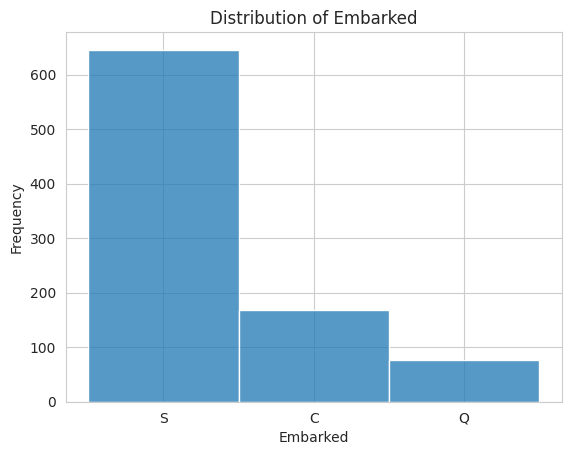

In [60]:
for column in df.columns:
    #plt.figure(figsize=(10, 5))
    sns.histplot(df[column], bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 2000x2000 with 0 Axes>

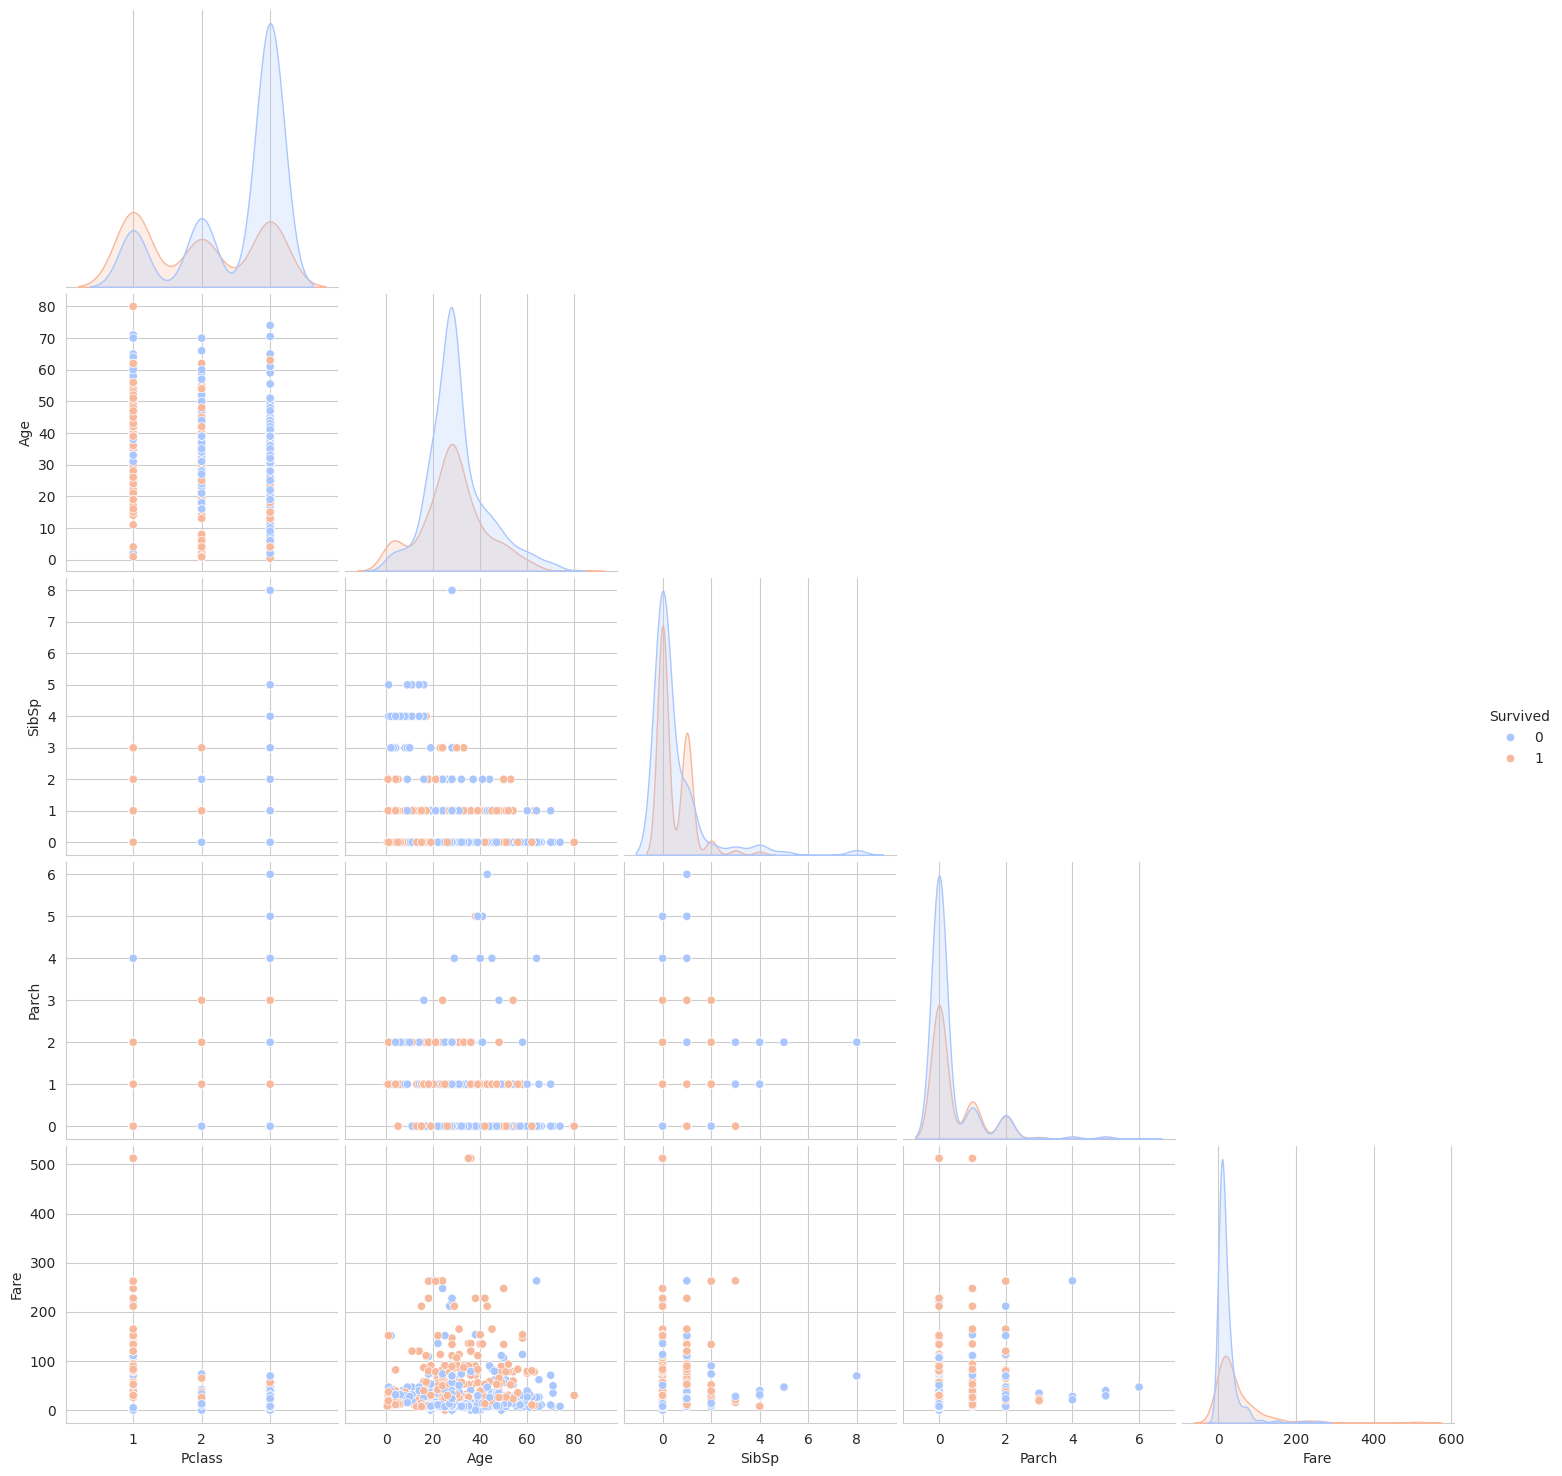

In [61]:
# Set a larger plot size
plt.figure(figsize=(20, 20))

# Create a colorful pairplot with a larger size, hue for 'Survived', and distinct color palette
sns.pairplot(df, hue="Survived", palette="coolwarm", corner=True, height=3)

# Display the plot
plt.show()